In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Experience in years
X = np.array([1, 2, 3, 5, 7, 10]).reshape(-1, 1)

# Corresponding salaries
y = np.array([30000, 35000, 45000, 60000, 80000, 120000])

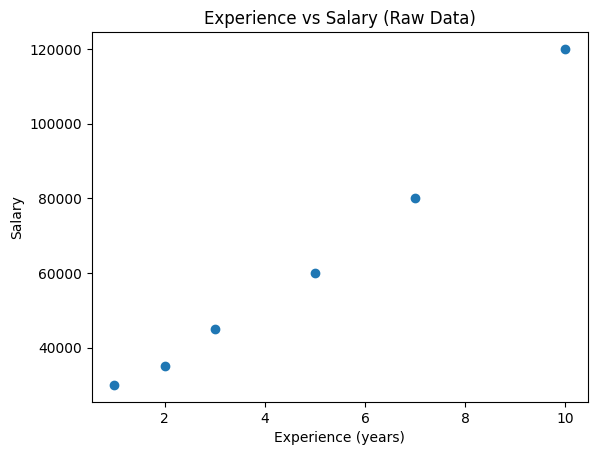

In [3]:
plt.scatter(X, y)
plt.xlabel("Experience (years)")
plt.ylabel("Salary")
plt.title("Experience vs Salary (Raw Data)")
plt.show()

In [4]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

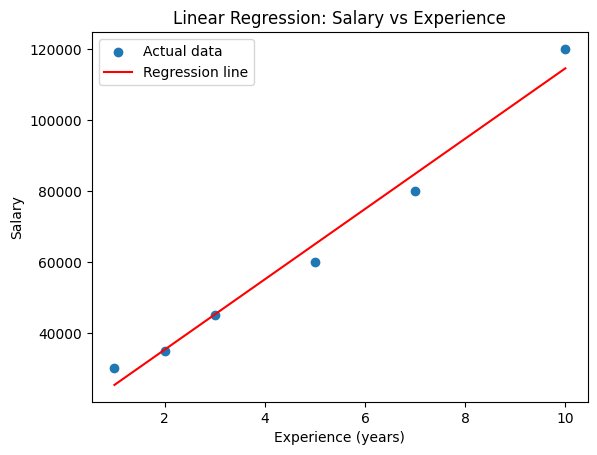

In [5]:
y_pred = model.predict(X)

plt.scatter(X, y, label="Actual data")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.xlabel("Experience (years)")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

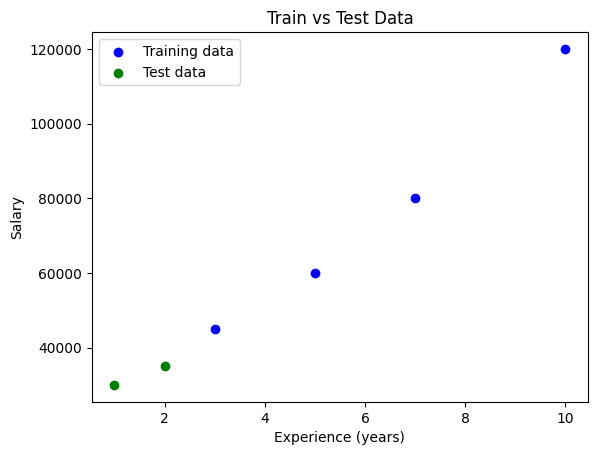

In [8]:
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.xlabel("Experience (years)")
plt.ylabel("Salary")
plt.title("Train vs Test Data")
plt.legend()
plt.show()

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

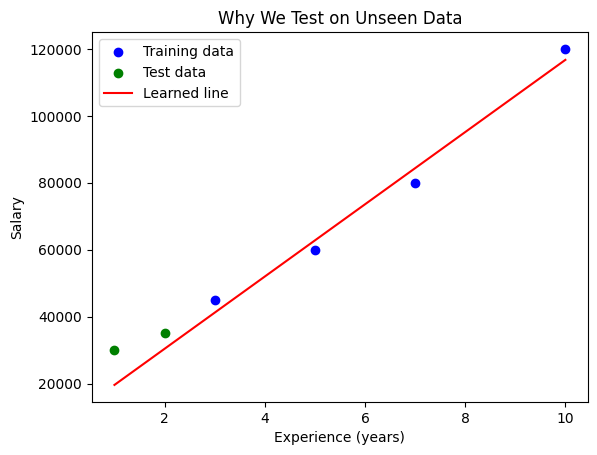

In [10]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.plot(X_line, y_line, color="red", label="Learned line")
plt.xlabel("Experience (years)")
plt.ylabel("Salary")
plt.title("Why We Test on Unseen Data")
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

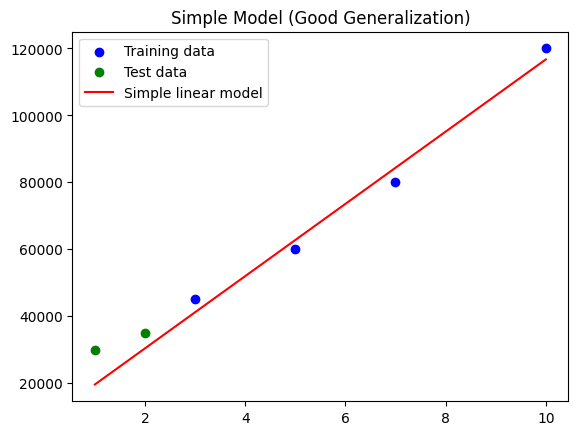

In [12]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = linear_model.predict(X_line)

plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.plot(X_line, y_line, color="red", label="Simple linear model")
plt.legend()
plt.title("Simple Model (Good Generalization)")
plt.show()

In [13]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_line_poly = poly.transform(X_line)

complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train)

y_poly = complex_model.predict(X_line_poly)

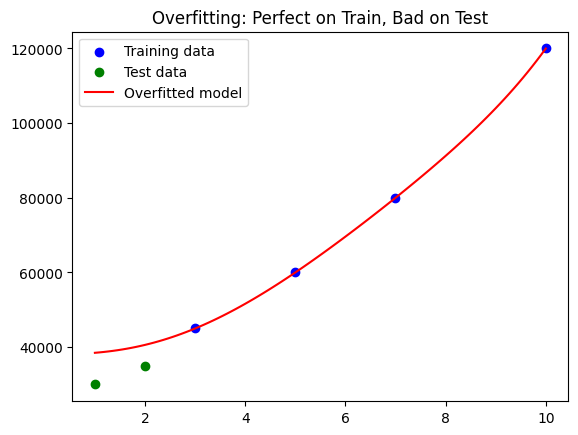

In [14]:
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.plot(X_line, y_poly, color="red", label="Overfitted model")
plt.legend()
plt.title("Overfitting: Perfect on Train, Bad on Test")
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error

train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_mae, test_mae

(3551.401869158879, 7523.364485981294)

In [16]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_r2, test_r2

(0.9836310346734503, -9.39916149882082)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae, test_mae, train_r2, test_r2

(3551.401869158877, 7523.364485981321, 0.9836310346734503, -9.399161498820886)